<a href="https://colab.research.google.com/github/Aditi1210/machinelearning_lab/blob/main/CST_Neural_network_for_Mnist_number_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#Loading-the-MNIST-dataset-in-Keras" data-toc-modified-id="Loading-the-MNIST-dataset-in-Keras-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Loading the MNIST dataset in Keras</a></span></li><li><span><a href="#The-network-architecture" data-toc-modified-id="The-network-architecture-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>The network architecture</a></span></li><li><span><a href="#The-compilation-step" data-toc-modified-id="The-compilation-step-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>The compilation step</a></span></li><li><span><a href="#Preparing-the-image-data" data-toc-modified-id="Preparing-the-image-data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Preparing the image data</a></span></li><li><span><a href="#Preparing-the-labels" data-toc-modified-id="Preparing-the-labels-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Preparing the labels</a></span></li><li><span><a href="#Training-and-Testing" data-toc-modified-id="Training-and-Testing-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Training and Testing</a></span></li></ul></div>

# Loading the MNIST dataset in Keras

In [2]:
from keras.datasets import mnist

In [3]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


- The images are encoded as Numpy arrays, and the labels are an array of digits, ranging from 0 to 9.

In [4]:
train_images.shape


(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [6]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
len(test_labels)

10000

In [9]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

Let's build the network

# The network architecture

- The core building block of neural networks is the **layer**, a data-processing module that you can think of as a filter for data.
    - Some data goes in, and it comes out in a more useful form.
    - Layers extract **representations** (hopefully, meaningful for the data problem at hand) out of the data fed into them.
    
- Most of deep learning consists of chaining together simple layers that will implement a form of progressive **data distillation**.
- A deep learning model is like a sieve for data-processing, made of a succession of increasingly refined data filters--**the layers**.

In [10]:
from keras import models
from keras import layers

In [36]:
network = models.Sequential()
# Dense(512) is a fully-connected layer with 512 hidden units.
# in the first layer, you must specify the expected input data shape :
# here, 28 X 28=784 -dimensional vectors.
network.add(layers.Dense(32, activation='relu', input_shape=(28 * 28, )))
network.add(layers.Dense(16, activation='tanht'))
network.add(layers.Dense(10, activation='sofmax'))

- Our network consists of a sequence of two *Dense* layers, which are densely connected (also called *fully connected*) neural layers.
- The second (and last) layer is a **10-way** *softmax* layer, which means it will return an array of **10** probability scores. Each score will be the probability that the current digit image belongs to one of our 10 digit classes. 

# The compilation step

- To make the network ready for training, we need to pick three more things, as part of the **compilation** step:
 - **A loss function**-- How the network will be able to measure its performance on the training data, and thus how it will be able to steer itself in the right direction.
 - **An optimizer**--The mechanism through which the network will update itself based on the data it sees and its loss function.
 - **Metrics to monitor during training and testing**--Here, we will only care about accuracy (the fraction of the images that were correctly classified).

In [37]:
network.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
    

# Preparing the image data

Before training, we will preprocess the data by reshaping it into the shape the network expects and scaling it so that all values are in the $[0-1]$ interval.

In [15]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255.

In [14]:
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255.

# Preparing the labels

We also need to categorically encode the labels.

In [16]:
from tensorflow.keras.utils import to_categorical

In [17]:
train_labels = to_categorical(train_labels)
train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [18]:
test_labels = to_categorical(test_labels)
test_labels

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

# Training and Testing

We are now ready to train the network, which in Keras is done via a call to the network's fit method--we fit the model to its training data:

In [35]:
network.fit(train_images, train_labels, epochs=20, batch_size=32)

Epoch 1/24
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0486 - accuracy: 0.9853
Epoch 2/24
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0460 - accuracy: 0.9866
Epoch 3/24
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0461 - accuracy: 0.9862
Epoch 4/24
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0451 - accuracy: 0.9871
Epoch 5/24
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0446 - accuracy: 0.9870
Epoch 6/24
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0448 - accuracy: 0.9867
Epoch 7/24
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0440 - accuracy: 0.9872
Epoch 8/24
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0443 - accuracy: 0.9870
Epoch 9/24
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0432 - accuracy: 0.9874
Epoch 10/24
1875/1875 [==============================] - 7s 4ms/step - loss: 0.042

- Two quantities are displayed during training:
    - The loss of the network over the training data
    - The accuracy of the network over the training data
    
- We quickly reach an accuracy of **$0.9886 (98.86\%)$** on the training data.

- Now let's check that the model performs well on the test set, too:

In [27]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 1.8778 - accuracy: 0.7519


In [28]:
print('Test Accuracy: {:.5f} '.format(test_acc))

Test Accuracy: 0.75190 


In [29]:
test_acc

0.7519000172615051

- The test-set accuracy turns out to be $97.780\%$--that is quite a bit lower than the training set accuracy. This gap between training and test accuracy is an example of **overfitting**:the fact that the ML models tend to perform worse on new data than on their training data.

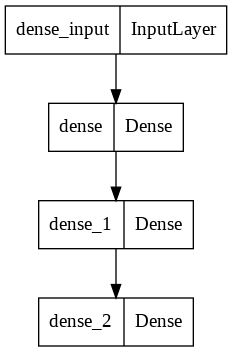

In [30]:
from tensorflow.keras.utils import plot_model
plot_model(network, to_file='model.png')

Epoch 1/20
629/629 [==============================] - 4s 6ms/step - loss: 0.0834 - accuracy: 0.9758 - val_loss: 0.0941 - val_accuracy: 0.9711
Epoch 2/20
629/629 [==============================] - 3s 5ms/step - loss: 0.0824 - accuracy: 0.9761 - val_loss: 0.0917 - val_accuracy: 0.9726
Epoch 3/20
629/629 [==============================] - 3s 5ms/step - loss: 0.0817 - accuracy: 0.9765 - val_loss: 0.0937 - val_accuracy: 0.9724
Epoch 4/20
629/629 [==============================] - 3s 5ms/step - loss: 0.0810 - accuracy: 0.9764 - val_loss: 0.0938 - val_accuracy: 0.9711
Epoch 5/20
629/629 [==============================] - 6s 10ms/step - loss: 0.0799 - accuracy: 0.9765 - val_loss: 0.0946 - val_accuracy: 0.9717
Epoch 6/20
629/629 [==============================] - 5s 8ms/step - loss: 0.0792 - accuracy: 0.9769 - val_loss: 0.0977 - val_accuracy: 0.9703
Epoch 7/20
629/629 [==============================] - 3s 5ms/step - loss: 0.0778 - accuracy: 0.9776 - val_loss: 0.0966 - val_accuracy: 0.9705
Epoch

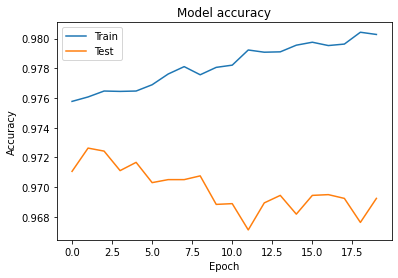

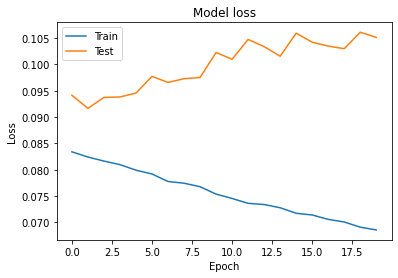

In [31]:
import matplotlib.pyplot as plt
history =network.fit(train_images, train_labels, validation_split=0.33,epochs=20, batch_size=64)
history_dict = history.history
print(history_dict.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()